# Perceptron from Scratch

## Basic Understanding

* It is a linear classifier (binary) and can only separate classes which are linearly separable.
* It looks like,
  * 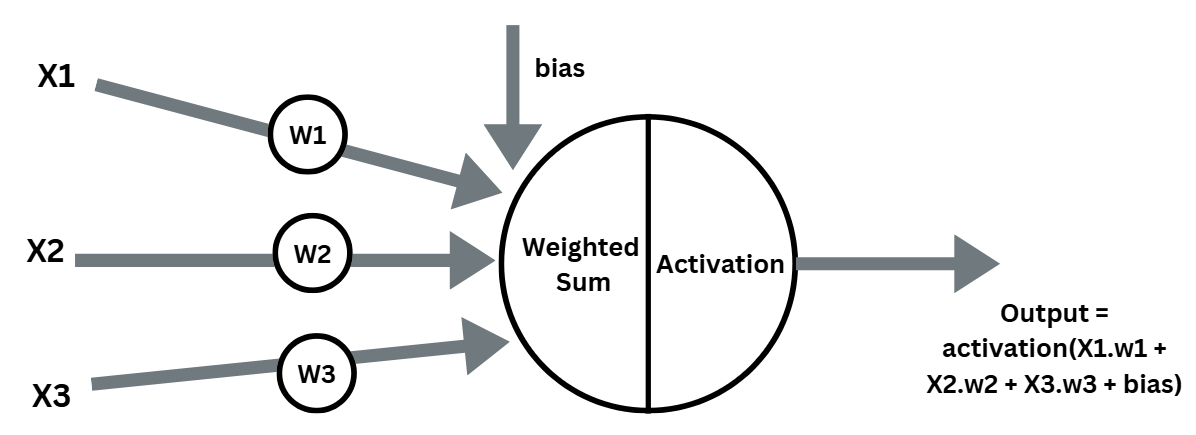
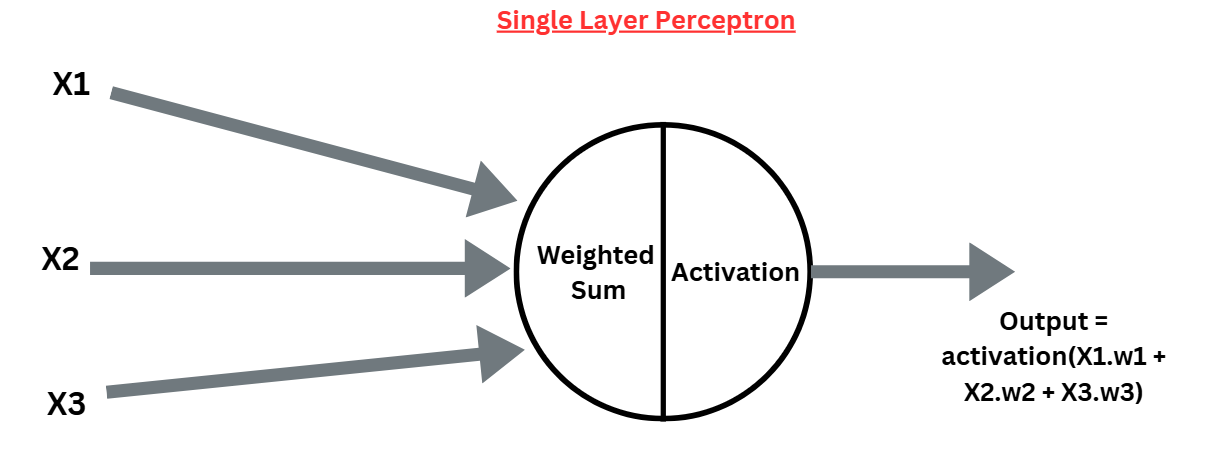

Popular activation functions for SLP
* Heaviside Step Function, $$H(x) = \begin{cases} 
0 & \text{if } x < 0 \\
1 & \text{if } x \geq 0 
\end{cases}$$
* Signum (Sign) function, $$
\operatorname{sgn}(x) = \begin{cases} 
-1 & \text{if } x < 0 \\
0 & \text{if } x = 0 \\
1 & \text{if } x > 0 
\end{cases}
$$


### Learning in Perceptron

* Inspired by **Hebbs's Rule** - when a biological neuron triggers another neuron, the connection between these two neurons grows stronger.
  * **Neuron that fire together, wire together**

**General Algorithm**
1. Set weigths and bias (random initialization) and select a learning rate $\eta$.
2. For each training sample,
    1. Compute the net output from the perceptron (without the activation).
    2. Apply activation function.
    3. Compute the prediction error.
    4. Update weights and bias
        1. $w_i = w_i + \eta*\text{Error}*x_i$
        2. $b_i = b_i + \eta*\text{Error}$
3. Repeat step 2 for all training samples in an epoch. 1 epoch is complete pass through the entire training dataset.
4. Repeat for multiple epoch. 
 

## Implementation

### Importing Libaries

In [385]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### Perceptron Class

* Initialization
    * input_size - denotes number of features in input that are going to be passed for processing. The weights matrix will have to be made of the same dimension column vector. Hence, input will be of dimension (for 1 training example feed) **[1, input_size]**.
    * bias - input_size does not impact bias. bias is **[1, 1]**.
    * weights - weights matrix is driven by input size, typically takes the size of **[input_size, 1]**.

### Matrix Equation for Single Layer Perceptron (for a batch_size of 3)

$$
\begin{bmatrix}
z_1 \\
z_2 \\
z_3
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{bmatrix}
\cdot
\begin{bmatrix}
w_1 \\
w_2 \\
w_3
\end{bmatrix}
+
\begin{bmatrix}
b \\
\end{bmatrix}
$$


In [386]:
class Perceptron:
    def __init__(self, learning_rate, epoch):
        '''
        input_size : this is actually the number of features per training example
        '''
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epoch = epoch

In [387]:
def activation(self, z):
    return np.heaviside(z, 0)
    
Perceptron.activation = activation

In [388]:
def forward_pass(self, X):
    weighted_sum = np.dot(X, self.weights) + self.bias # this will still be a matrix
    output = self.activation(weighted_sum)
    return output

Perceptron.forward_pass = forward_pass

In [389]:
def fit(self, X, y):
    '''
    X: training set 
    y: output labels corresponding to X
    '''
    self.input_size = X.shape[1]
    self.weights = np.random.rand(self.input_size, 1)
    self.bias = 0
    total_examples = X.shape[0]
    self.accuracy_log = []
    
    # In this, we will fit the training set to the defined perceptron
    # Let's define for a batch size of 1
    for ep in range(0, self.epoch):
        print("Running for epoch {} -->".format(ep), end=" ")
        for training_example in range(0, total_examples):
            output = self.forward_pass(X[training_example]) 
            error = y[training_example] - output

            self.weights = self.weights + self.learning_rate*error*X[training_example].reshape(1,-1).T
            self.bias = self.bias + self.learning_rate*error
        # printing accuracy at the end of an epoch
        print("Accuracy: {}".format(accuracy_score(self.predict(X), y)))   
        self.accuracy_log.append(accuracy_score(self.predict(X), y))
        
Perceptron.fit = fit

In [390]:
def predict(self, X):
    prediction = self.forward_pass(X)

    return prediction

Perceptron.predict = predict

### Loading Dataset

In [391]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [392]:
# Prepare train and test set
X = iris.data[:, (0, 1)] # petal length, petal width
y = (iris.target == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [393]:
X_train.shape, y_train.shape

((105, 2), (105,))

### Launching the Perceptron now ...

In [394]:
perceptron = Perceptron(.001, 50)

In [395]:
perceptron.fit(X_train, y_train)

Running for epoch 0 --> Accuracy: 0.9904761904761905
Running for epoch 1 --> Accuracy: 0.9904761904761905
Running for epoch 2 --> Accuracy: 0.9809523809523809
Running for epoch 3 --> Accuracy: 0.9714285714285714
Running for epoch 4 --> Accuracy: 0.9904761904761905
Running for epoch 5 --> Accuracy: 0.9904761904761905
Running for epoch 6 --> Accuracy: 0.9904761904761905
Running for epoch 7 --> Accuracy: 0.9809523809523809
Running for epoch 8 --> Accuracy: 0.9714285714285714
Running for epoch 9 --> Accuracy: 0.9904761904761905
Running for epoch 10 --> Accuracy: 0.9904761904761905
Running for epoch 11 --> Accuracy: 0.9904761904761905
Running for epoch 12 --> Accuracy: 0.9809523809523809
Running for epoch 13 --> Accuracy: 0.9714285714285714
Running for epoch 14 --> Accuracy: 0.9904761904761905
Running for epoch 15 --> Accuracy: 0.9904761904761905
Running for epoch 16 --> Accuracy: 0.9904761904761905
Running for epoch 17 --> Accuracy: 0.9809523809523809
Running for epoch 18 --> Accuracy: 0.9

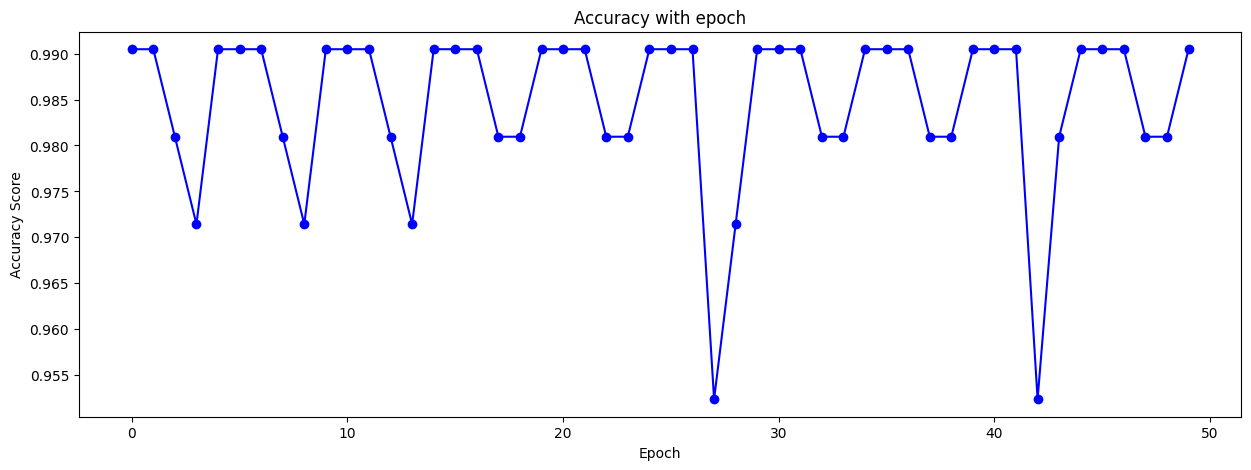

In [396]:
### plotting the accuracy curve
plt.figure(figsize=(15,5))
plt.plot(list(range(len(perceptron.accuracy_log))), 
         perceptron.accuracy_log, 
         marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.title("Accuracy with epoch")
plt.show()

In [397]:
# Performance on test set
print(classification_report(y_test, perceptron.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

